In [96]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [97]:
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [99]:
stock = "Goog"
google_data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [177]:
google_data

,Open,High,Low,Close,Adj Close,Volume,MA_for_250_days,MA_for_100_days
Date,,,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216,NaN,NaN
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488,NaN,NaN
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939,NaN,NaN
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159,NaN,NaN
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-08-12,165.994995,166.699997,163.550003,163.949997,163.949997,12435000,151.104217,170.873472
2024-08-13,165.184998,166.539993,164.770004,165.929993,165.929993,12717600,151.247450,171.037673
2024-08-14,164.210007,164.960007,159.529999,162.029999,162.029999,22515900,151.379717,171.172264


In [101]:
google_data.shape

(5033, 6)

In [102]:
google_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [103]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")

In [104]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

Text(0.5, 1.0, 'Closing price of Google data')

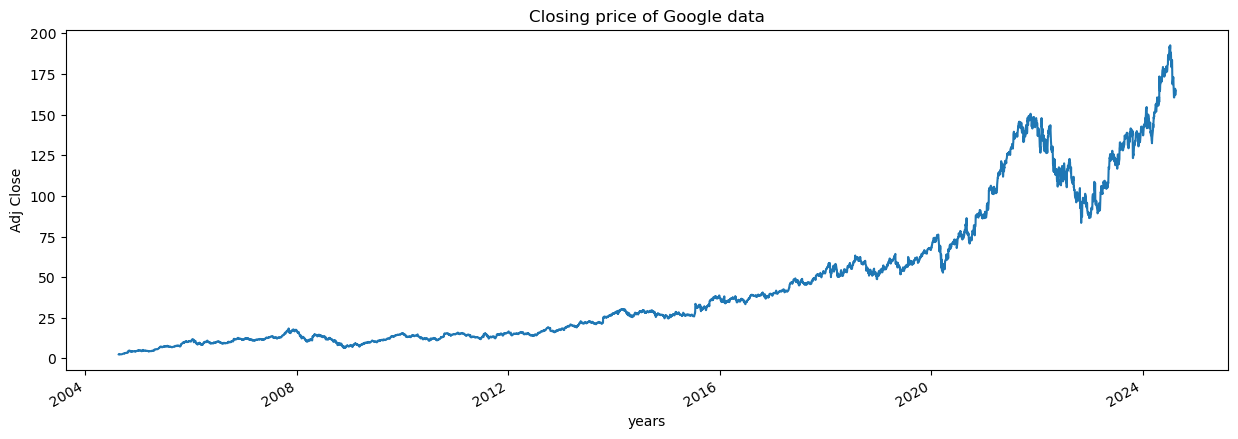

In [105]:
plt.figure(figsize = (15,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google data")

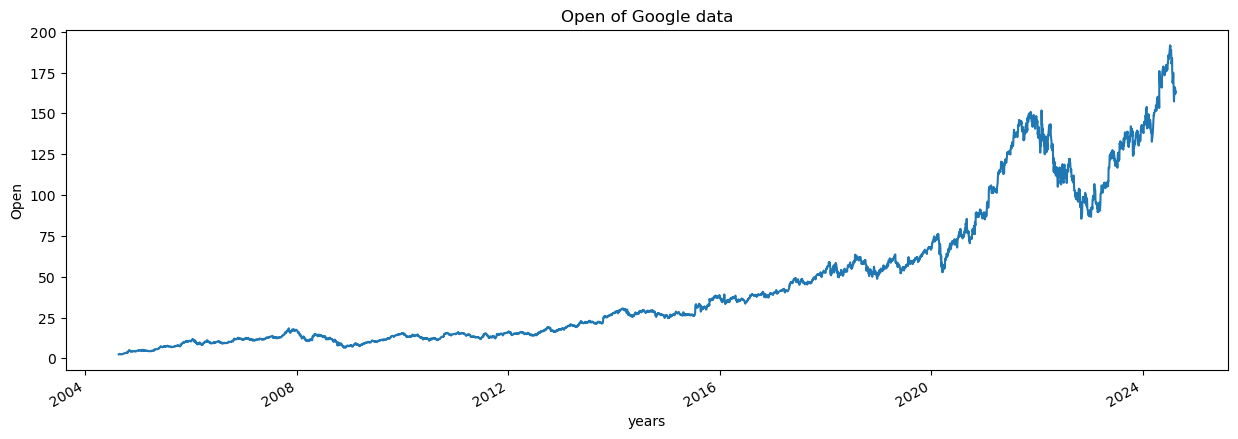

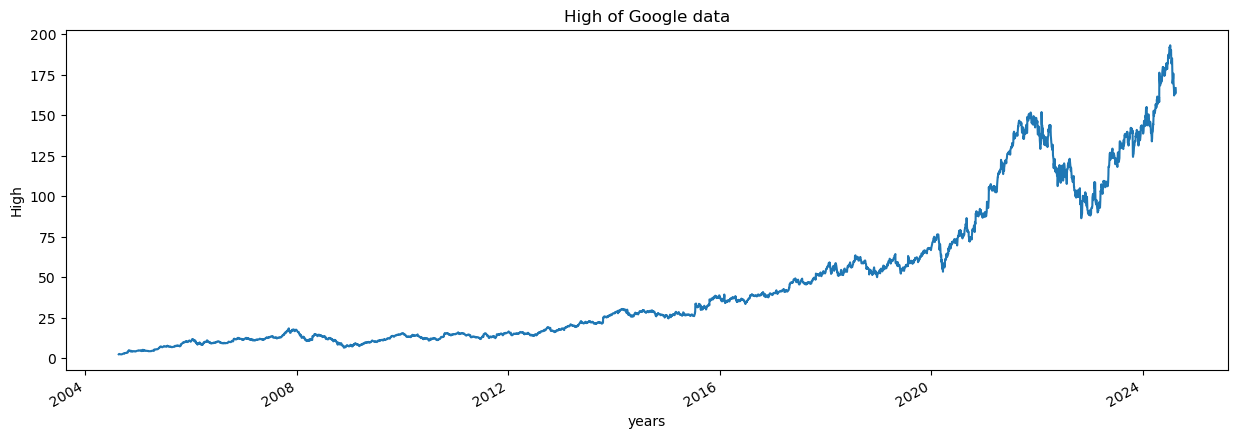

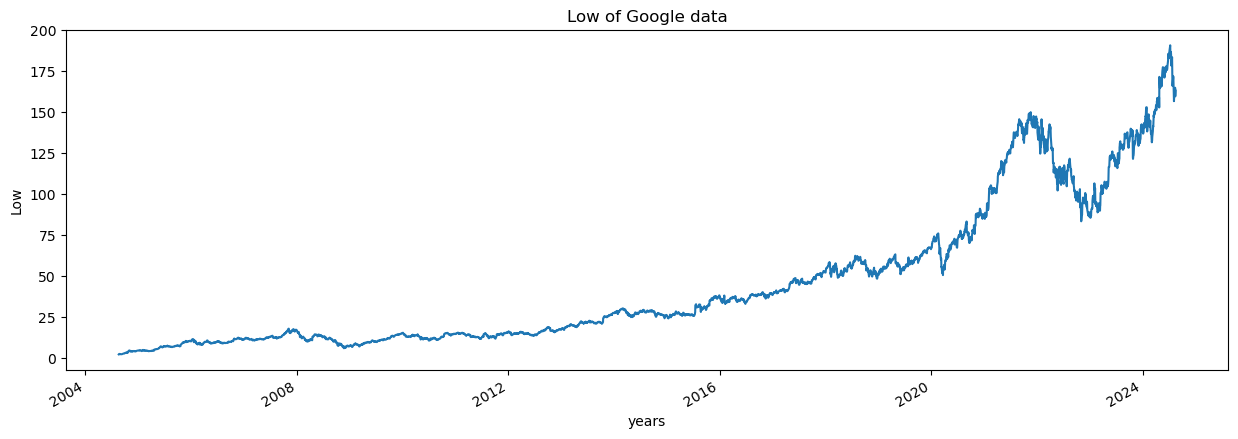

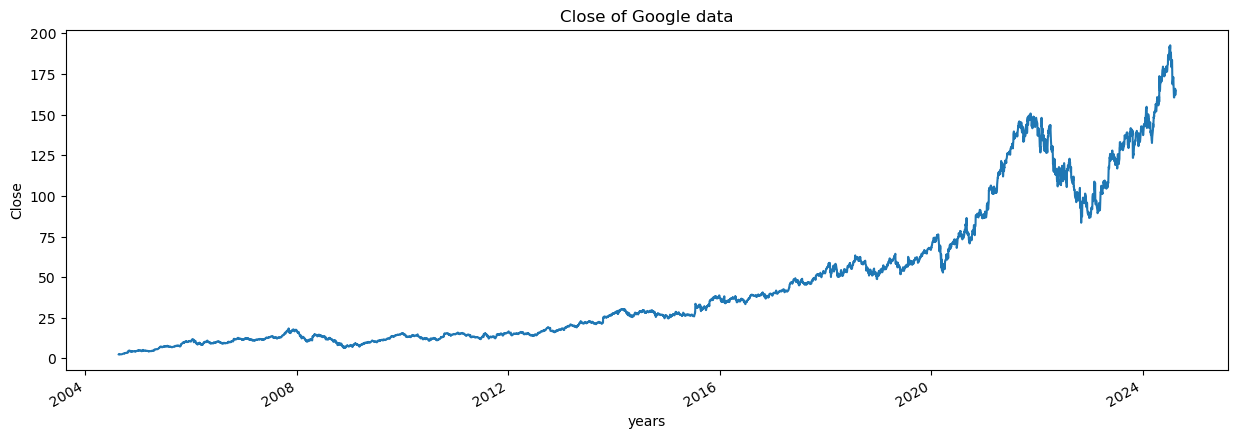

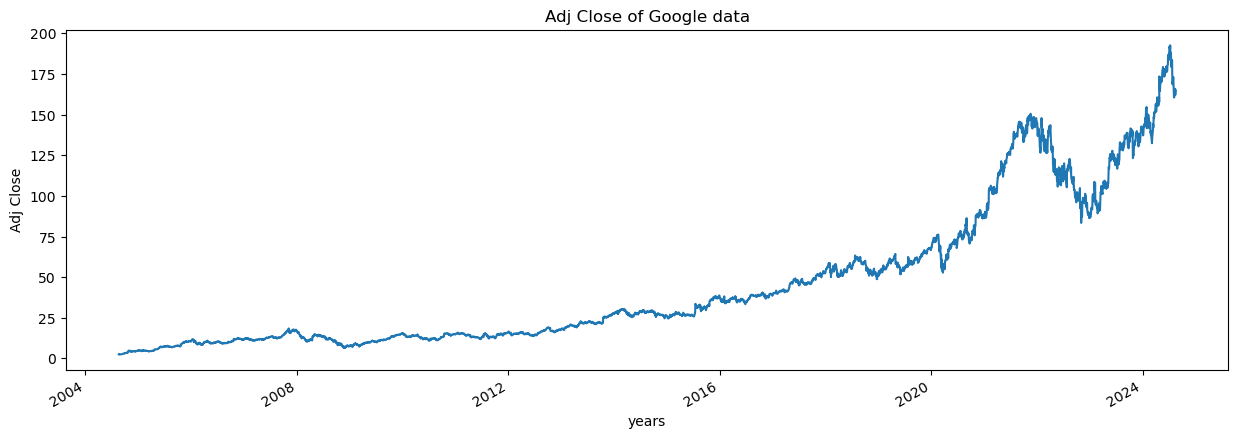

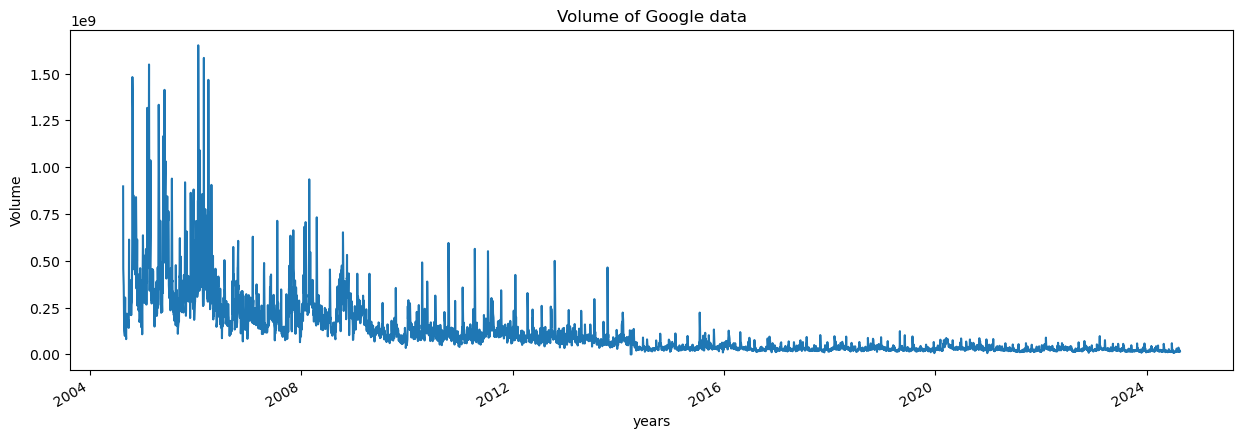

In [106]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [107]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [108]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [109]:
# Calculate the rolling mean and store it in a new column
data['MA'] = data[0].rolling(5).mean()  # Specify the column to calculate the rolling mean on
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [110]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 94
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 158


In [111]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [112]:
google_data['MA_for_250_days'][0:250].tail()

Date
2005-08-09         NaN
2005-08-10         NaN
2005-08-11         NaN
2005-08-12         NaN
2005-08-15    5.028317
Name: MA_for_250_days, dtype: float64

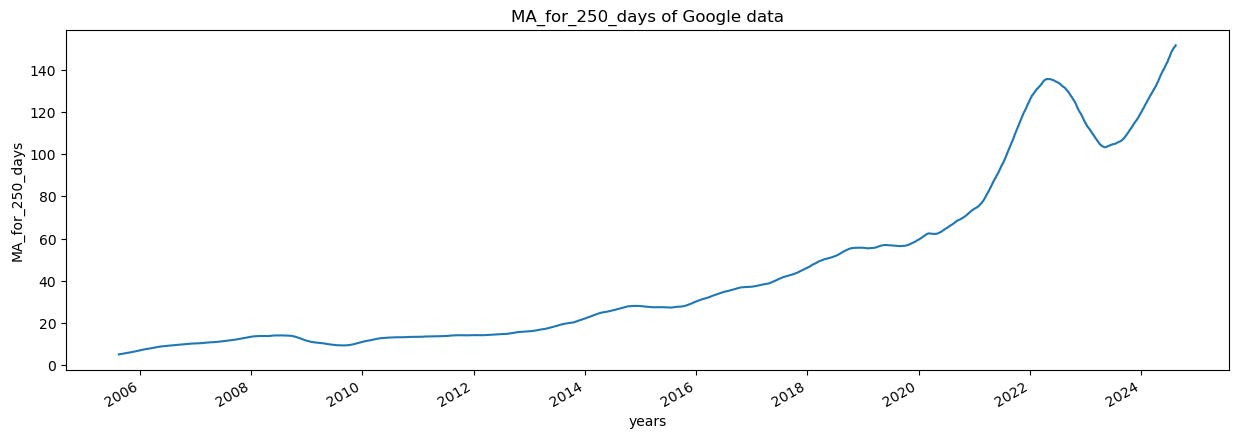

In [113]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

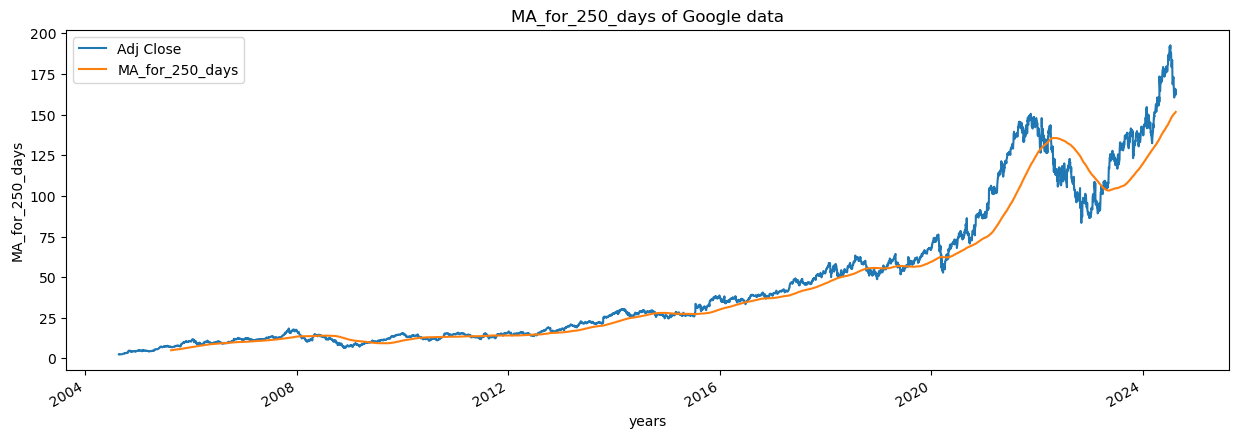

In [114]:
plot_graph((15,5), google_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

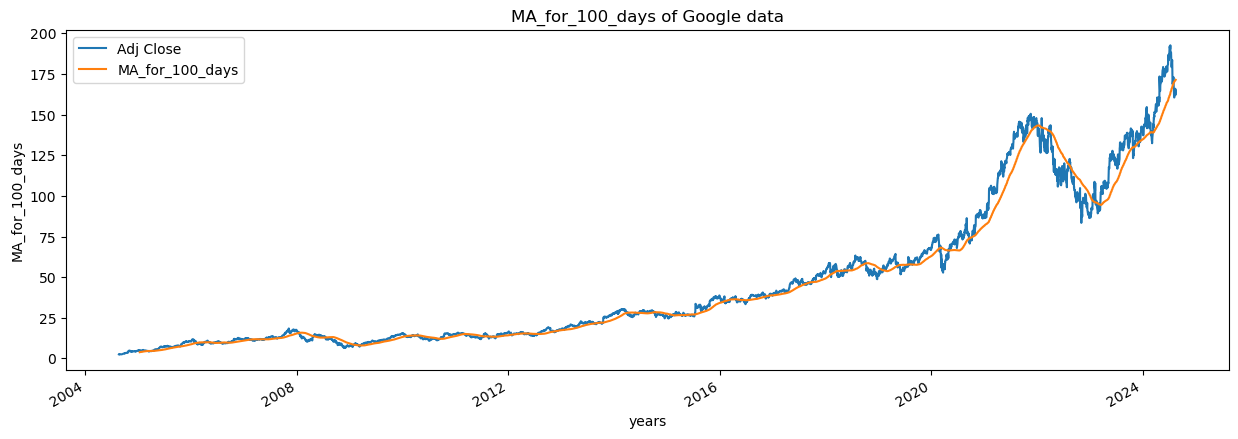

In [115]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

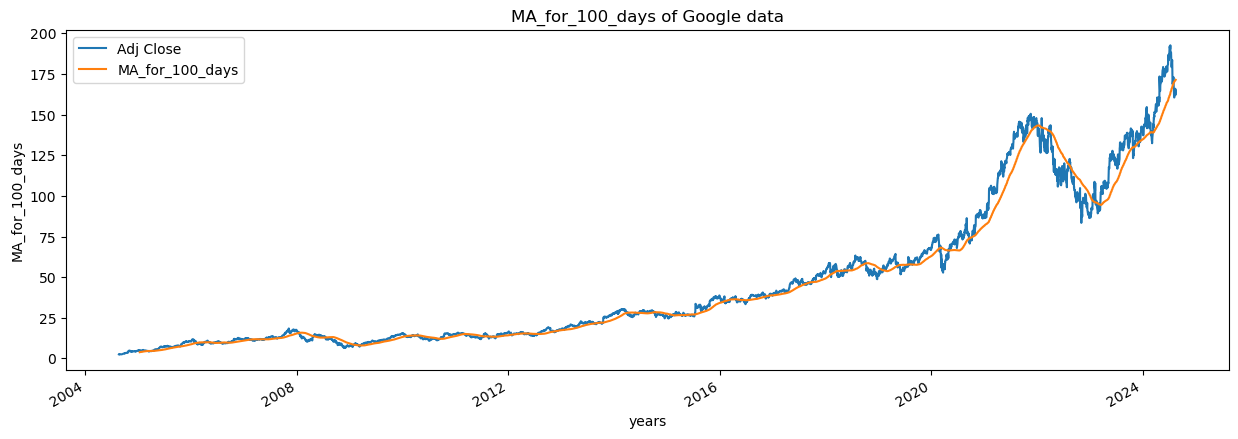

In [116]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

In [117]:
Adj_close_price = google_data[['Adj Close']]

In [118]:
max(Adj_close_price.values),min(Adj_close_price.values)

(array([192.66000366]), array([2.48808169]))

In [119]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[4.31749279e-05],
       [1.08581220e-03],
       [1.22840556e-03],
       ...,
       [8.38935188e-01],
       [8.44929760e-01],
       [8.53185487e-01]])

In [120]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [121]:
int(len(x_data)*0.7)

3453

In [122]:
4908-100-int(len(x_data)*0.7)

1355

In [123]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [124]:
pip install keras


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [125]:
pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [126]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [144]:
#1. Bidirectional LSTM Model

In [168]:
from keras.layers import Bidirectional

# Define the Bidirectional LSTM model
model_bi_lstm = Sequential()
model_bi_lstm.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(x_train.shape[1], 1)))
model_bi_lstm.add(Bidirectional(LSTM(64, return_sequences=False)))
model_bi_lstm.add(Dense(25))
model_bi_lstm.add(Dense(1))

# Compile and train the model
model_bi_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_bi_lstm.fit(x_train, y_train, batch_size=1, epochs=1)

# Make predictions
predictions_bi_lstm = model_bi_lstm.predict(x_test)

# Calculate RMSE
rmse_bi_lstm = np.sqrt(np.mean((predictions_bi_lstm - y_test)**2))
print("Bidirectional LSTM RMSE:", rmse_bi_lstm)

3453/3453 ━━━━━━━━━━━━━━━━━━━━ 310s 86ms/step - loss: 1.7672e-04
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step
Bidirectional LSTM RMSE: 0.024216002863191418


In [167]:
model_bi_lstm.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_4 (Bidirectional) │ (None, 100, 256)       │       133,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 25)             │         3,225 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 902,171 (3.44 MB)

 Trainable params: 300,723 (1.15 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 601,448 (2.29 MB)

In [152]:
#2.GRU

In [143]:
from keras.layers import GRU

# Define the GRU model
model_gru = Sequential()
model_gru.add(GRU(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model_gru.add(GRU(64, return_sequences=False))
model_gru.add(Dense(25))
model_gru.add(Dense(1))

# Compile and train the model
model_gru.compile(optimizer='adam', loss='mean_squared_error')
model_gru.fit(x_train, y_train, batch_size=1, epochs=1)

# Make predictions
predictions_gru = model_gru.predict(x_test)

# Calculate RMSE
rmse_gru = np.sqrt(np.mean((predictions_gru - y_test)**2))
print("GRU RMSE:", rmse_gru)



C:\Users\User\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3453/3453 ━━━━━━━━━━━━━━━━━━━━ 171s 47ms/step - loss: 1.6016e-04
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step
GRU RMSE: 0.01493686482914783


In [ ]:
#3. 1D CNN Model

In [136]:
from keras.layers import Conv1D, Flatten

# Define the 1D CNN model
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(x_train.shape[1], 1)))
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model_cnn.add(Flatten())
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(1))

# Compile and train the model
model_cnn.compile(optimizer='adam', loss='mean_squared_error')
model_cnn.fit(x_train, y_train, batch_size=1, epochs=1)

# Make predictions
predictions_cnn = model_cnn.predict(x_test)

# Calculate RMSE
rmse_cnn = np.sqrt(np.mean((predictions_cnn - y_test)**2))
print("1D CNN RMSE:", rmse_cnn)


C:\Users\User\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3453/3453 ━━━━━━━━━━━━━━━━━━━━ 57s 12ms/step - loss: 3.6450e-04
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
1D CNN RMSE: 0.0517318000795581


In [150]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, GlobalAveragePooling1D
from tensorflow.keras.models import Model

class TransformerModel(tf.keras.layers.Layer):
    def __init__(self, num_heads, embed_dim, ff_dim, rate=0.1):
        super(TransformerModel, self).__init__()
        self.attention = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential([
            Dense(ff_dim, activation="relu"),
            Dense(embed_dim),
        ])
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, inputs, training=None):
        attn_output = self.attention(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

# Define the input shape using the Functional API
input_layer = Input(shape=(x_train.shape[1], 1))

# Pass the input through the Transformer model
transformer_layer = TransformerModel(num_heads=2, embed_dim=64, ff_dim=128)(input_layer)

# Use GlobalAveragePooling1D to collapse the sequence dimension
global_avg_pooling = GlobalAveragePooling1D()(transformer_layer)

# Add the final output layer
output_layer = Dense(1)(global_avg_pooling)

# Create the model
transformer_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
transformer_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
transformer_model.fit(x_train, y_train, batch_size=1, epochs=1)

# Make predictions
predictions_transformer = transformer_model.predict(x_test)

# Calculate RMSE
rmse_transformer = np.sqrt(np.mean((predictions_transformer - y_test)**2))
print("Transformer RMSE:", rmse_transformer)


3453/3453 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - loss: 0.1575
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
Transformer RMSE: 0.5333814917812643


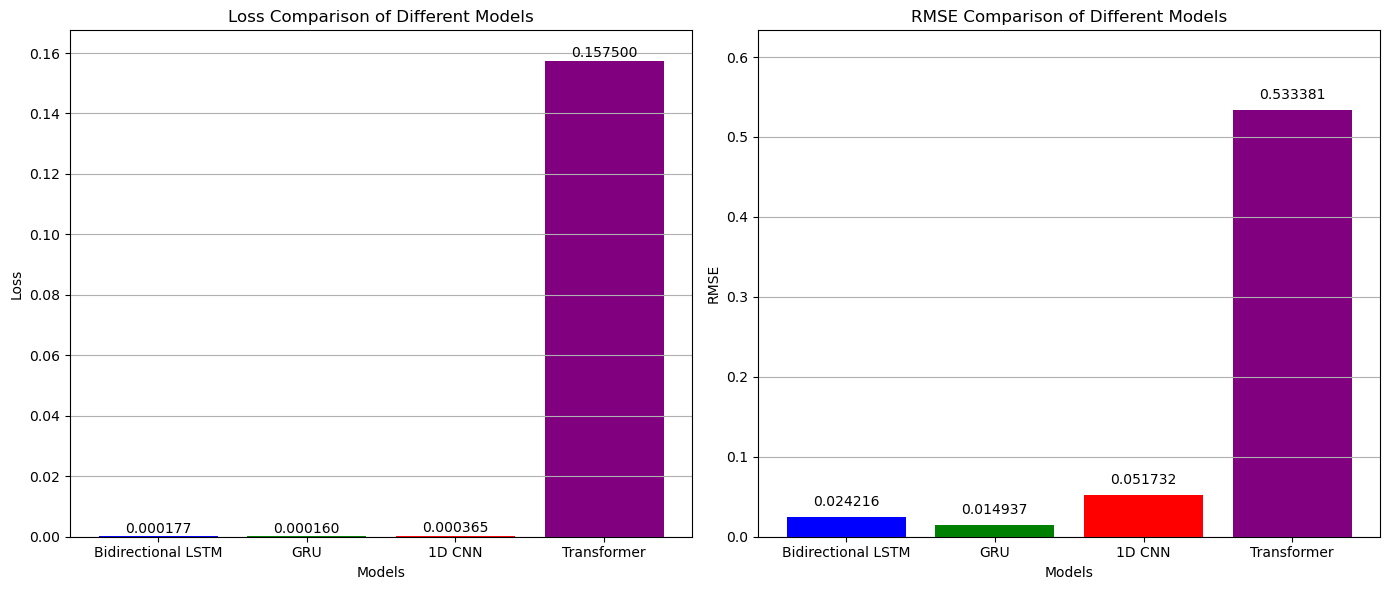

In [169]:
import matplotlib.pyplot as plt

# Loss values (you can adjust these based on your actual training results)
loss_values = {
    'Bidirectional LSTM': 1.7672e-04,
    'GRU': 1.6016e-04,
    '1D CNN': 3.6450e-04,
    'Transformer': 0.1575
}

# RMSE values (based on the output from your models)
rmse_values = {
    'Bidirectional LSTM': 0.024216002863191418,
    'GRU': 0.01493686482914783,
    '1D CNN': 0.0517318000795581,
    'Transformer': 0.5333814917812643
}

# Models
models = list(loss_values.keys())

# Plotting the Loss values
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
bars_loss = plt.bar(models, loss_values.values(), color=['blue', 'green', 'red', 'purple'])
for bar in bars_loss:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.0001, f'{yval:.6f}', ha='center', va='bottom')

plt.title('Loss Comparison of Different Models')
plt.xlabel('Models')
plt.ylabel('Loss')
plt.ylim([0, max(loss_values.values()) + 0.01])
plt.grid(axis='y')

# Plotting the RMSE values
plt.subplot(1, 2, 2)
bars_rmse = plt.bar(models, rmse_values.values(), color=['blue', 'green', 'red', 'purple'])
for bar in bars_rmse:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.6f}', ha='center', va='bottom')

plt.title('RMSE Comparison of Different Models')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.ylim([0, max(rmse_values.values()) + 0.1])
plt.grid(axis='y')

plt.tight_layout()
plt.show()


In [176]:
import numpy as np